In [11]:
from numpy import sin, cos, pi, sqrt, shape, linspace, meshgrid, zeros, mod
from math import factorial
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mp3d
import sympy as simp

In [12]:
def Shperical2Cartesian(r, theta, phi):
    x = r*sin(theta)*cos(phi)
    y = r*sin(theta)*sin(phi)
    z = r*cos(theta)
    return x, y, z

In [13]:
def Legendre_Poly(n, x):
    if n == 0:
        p = 1
    elif n == 1:
        p = x
    else:
        p = (1/n)*((2*n-1)* x* Legendre_Poly(n-1, x) - (n-1)* Legendre_Poly(n-2, x))
    return p  

In [14]:
def Asso_Leg(l,m,x):
    try:
        if m == 0:
            p = Legendre_Poly(l,x)
        elif m > 0:
            p = (1/ sqrt(1-x**2))*((l-m+1)* x* Asso_Leg(l,m-1,x) - (l+m-1)* Asso_Leg(l-1,m-1,x))
            
        elif m < 0:
            m = abs(m)
            p = ((-1)**m)*(factorial(l-m)/ factorial(l+m))* Asso_Leg(l,m,x)
    except ZeroDivisionError:
        p = 0
    return p    

In [15]:
l = int(input('Azimuthal quantum number "l": '))
if l<0:
    print('"l" can not be a negative number')

m = int(input('Magnetic quantum number "m": '))
if m>l or m<(-l):
    print('quantum number "m" belong to "[-l,l]" ')


Azimuthal quantum number "l": 


ValueError: invalid literal for int() with base 10: ''

In [16]:
K = sqrt( ((2*l+1)* factorial(l-abs(m)))/(4*pi*factorial(l+abs(m))) )


In [17]:
phi = linspace(0, 2*pi, 100)
tht = linspace(0, pi, 100)

phi,tht = meshgrid(phi,tht)

In [18]:
p,q = shape(phi)
Y = zeros([p,q])

for i in range(0+1,p-1):
    for j in range(0+1,q-1):
        if m>0:
            Y[i,j] = sqrt(2)*K*cos(m*phi[i,j])* Asso_Leg(l,m,cos(tht[i,j]))
        elif m<0:
            Y[i,j] = sqrt(2)*K*sin(abs(m)*phi[i,j])* Asso_Leg(l, abs(m), cos(tht[i,j]))
        elif m == 0:
            Y[i,j] = K* Legendre_Poly(l, cos(tht[i,j]))

In [19]:
p,q = shape(Y)

for i in range(0,p):
    for j in range(0,q):
        if Y[i,j]<0:
            tht[i,j] = tht[i,j]+pi

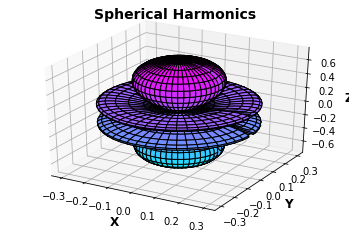

In [20]:
x,y,z = Shperical2Cartesian(Y, tht, phi)

fig = plt.figure('Harmonics')
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z, cmap = 'cool', edgecolor = 'k')


plt.title('Spherical Harmonics', fontsize = 14, fontweight = 'bold')
ax.set_xlabel('X', fontsize =12, fontweight = 'bold')
ax.set_ylabel('Y', fontsize =12, fontweight = 'bold')
ax.set_zlabel('Z', fontsize =12, fontweight = 'bold')

plt.show()



In [21]:
simp.legendre_poly?